<a href="https://colab.research.google.com/github/ShubhamKNIT/DeepRazor/blob/Testing-with-github/Inpainting_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate torch torchvision

In [3]:
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import torch

# Load the pipeline
model_id = "stabilityai/stable-diffusion-2-inpainting"
pipe = StableDiffusionInpaintPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
# Load your image and mask
image = Image.open("dog.jpg").convert("RGB")  # Original image
mask = Image.open("data_mask.png").convert("L")     # Binary mask (white = inpaint area, black = keep)

# Perform inpainting
prompt = "Fill the background seamlessly without any artifacts"
result = pipe(prompt=prompt, image=image, mask_image=mask).images[0]

# Save and display the result
result.save("output_inpainted.jpg")
result.show()

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
from PIL import Image, ImageChops

# Load the image and mask
image = Image.open("dog.jpg").convert("RGB")  # Original image
mask = Image.open("data_mask.png").convert("L")     # Mask image (grayscale)

# Resize the mask to match the image dimensions (if needed)
mask = mask.resize(image.size)

# Merge the mask over the image
# Convert the grayscale mask to an RGBA mask with transparency
rgba_mask = Image.new("RGBA", image.size)
rgba_mask.paste(Image.new("RGBA", image.size, (255, 0, 0, 128)), mask=mask)

# Overlay the mask on the image
merged_image = Image.alpha_composite(image.convert("RGBA"), rgba_mask)

# Save and display the result
merged_image.save("dog_with_mask.png")
merged_image.show()

In [15]:
from PIL import Image
import numpy as np

# Load the mask and convert to a NumPy array
mask = Image.open("data_mask.png").convert("L")
mask_array = np.array(mask)

# Get the dimensions of the mask
height, width = mask_array.shape

# Turn the right half of the mask to black
mask_array[:, width // 3 * 2:] = 0  # Set all pixels in the right half to black (0)

# Alternatively, turn the bottom half to black
# mask_array[height // 2:, :] = 0  # Uncomment this line to modify the bottom half

# Convert the modified array back to an image
modified_mask = Image.fromarray(mask_array)
modified_mask.save("modified_mask_half_black.jpg")
modified_mask.show()

In [17]:
from PIL import Image, ImageChops

# Load the image and mask
image = Image.open("dog.jpg").convert("RGB")  # Original image
mask = Image.open("modified_mask_half_black.jpg").convert("L")     # Mask image (grayscale)

# Resize the mask to match the image dimensions (if needed)
mask = mask.resize(image.size)

# Merge the mask over the image
# Convert the grayscale mask to an RGBA mask with transparency
rgba_mask = Image.new("RGBA", image.size)
rgba_mask.paste(Image.new("RGBA", image.size, (255, 0, 0, 128)), mask=mask)

# Overlay the mask on the image
merged_image = Image.alpha_composite(image.convert("RGBA"), rgba_mask)

# Save and display the result
merged_image.save("dog_with_mask.png")
merged_image.show()

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

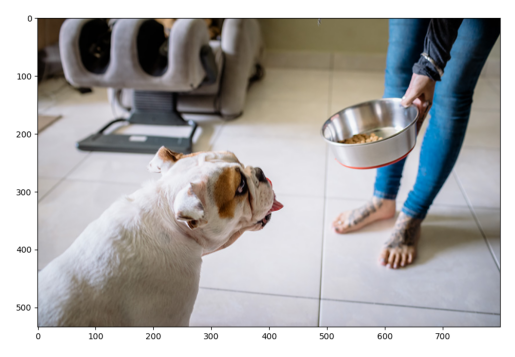

In [21]:
show_image("dog.jpg")

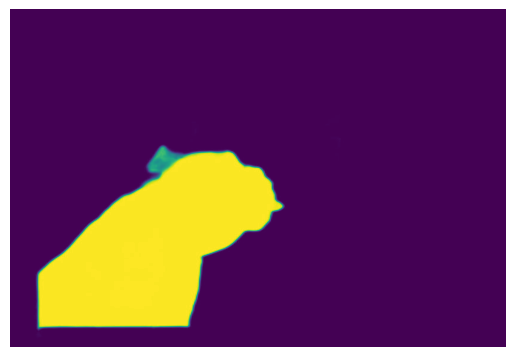

In [22]:
show_image("modified_mask_half_black.jpg")

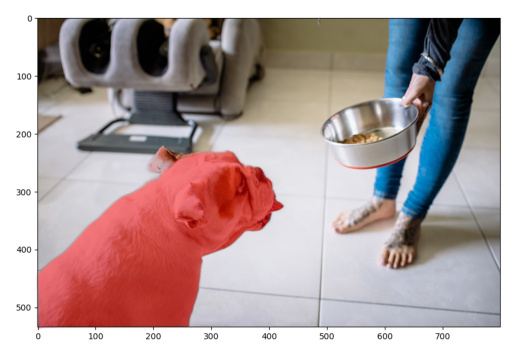

In [23]:
show_image("dog_with_mask.png")

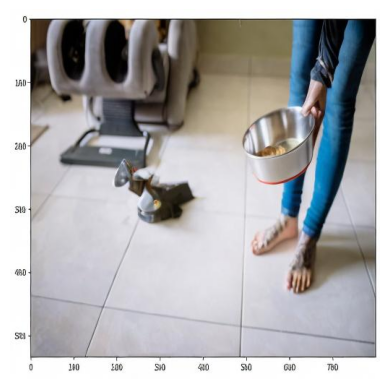

In [33]:
show_image("output_inpainted.jpg")